In [36]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
# Load Dataset
df = pd.read_csv('data/salaries.csv')

In [26]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,EN,FT,Cyber Security Analyst,45000,EUR,50000,FR,50,FR,L
1,2024,SE,FT,Security Architect,300000,USD,300000,US,0,US,M
2,2024,SE,FT,Security Architect,200000,USD,200000,US,0,US,M
3,2024,EX,FT,Privacy Officer,297000,USD,297000,US,0,US,M
4,2024,EX,FT,Privacy Officer,216000,USD,216000,US,0,US,M


In [27]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [28]:
print("Data types of each column:")
df.dtypes

Data types of each column:


work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [29]:
# Convert columns to appropriate data types

# Convert 'work_year' to string (no change needed)

# Convert 'experience_level' to category
df['experience_level'] = df['experience_level'].astype('category')

# Convert 'employment_type' to category
df['employment_type'] = df['employment_type'].astype('category')

# Convert 'job_title' to string (no change needed)

# Convert 'salary' to float
df['salary'] = df['salary'].astype(float)

# Convert 'salary_currency' to string (no change needed)

# Convert 'salary_in_usd' to float
df['salary_in_usd'] = df['salary_in_usd'].astype(float)

# Convert 'employee_residence' to string (no change needed)

# Convert 'remote_ratio' to category (assuming it represents categories)
df['remote_ratio'] = df['remote_ratio'].astype('category')

# Convert 'company_location' to string (no change needed)

# Convert 'company_size' to category
df['company_size'] = df['company_size'].astype('category')

# Check data types after conversion
print("\nData types after conversion:")
df.dtypes


Data types after conversion:


work_year                int64
experience_level      category
employment_type       category
job_title               object
salary                 float64
salary_currency         object
salary_in_usd          float64
employee_residence      object
remote_ratio          category
company_location        object
company_size          category
dtype: object

In [30]:
duplicate_rows = df[df.duplicated()]
duplicate_rows

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
31,2024,SE,FT,Security Engineer,230000.0,USD,230000.0,US,0,US,M
32,2024,SE,FT,Security Engineer,168000.0,USD,168000.0,US,0,US,M
43,2024,SE,FT,Security Engineer,238050.0,USD,238050.0,US,0,US,M
44,2024,SE,FT,Security Engineer,175950.0,USD,175950.0,US,0,US,M
57,2024,SE,FT,Security Engineer,190000.0,USD,190000.0,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
5042,2021,MI,FT,Cyber Security Analyst,90000.0,USD,90000.0,US,100,US,L
5129,2021,MI,FT,Information Security Engineer,120000.0,USD,120000.0,US,100,US,L
5171,2021,MI,FT,Penetration Tester,100000.0,USD,100000.0,US,100,US,M
5199,2021,EN,FT,Cyber Security Analyst,80000.0,USD,80000.0,US,50,US,L


In [31]:
df_cleaned = df.drop_duplicates()
df_cleaned.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,EN,FT,Cyber Security Analyst,45000.0,EUR,50000.0,FR,50,FR,L
1,2024,SE,FT,Security Architect,300000.0,USD,300000.0,US,0,US,M
2,2024,SE,FT,Security Architect,200000.0,USD,200000.0,US,0,US,M
3,2024,EX,FT,Privacy Officer,297000.0,USD,297000.0,US,0,US,M
4,2024,EX,FT,Privacy Officer,216000.0,USD,216000.0,US,0,US,M


In [32]:
# Check DataFrame shape before removing duplicates
print("Shape before removing duplicates:", df.shape)
# Check DataFrame shape after removing duplicates
print("Shape after removing duplicates:", df_cleaned.shape)

Shape before removing duplicates: (5330, 11)
Shape after removing duplicates: (3649, 11)


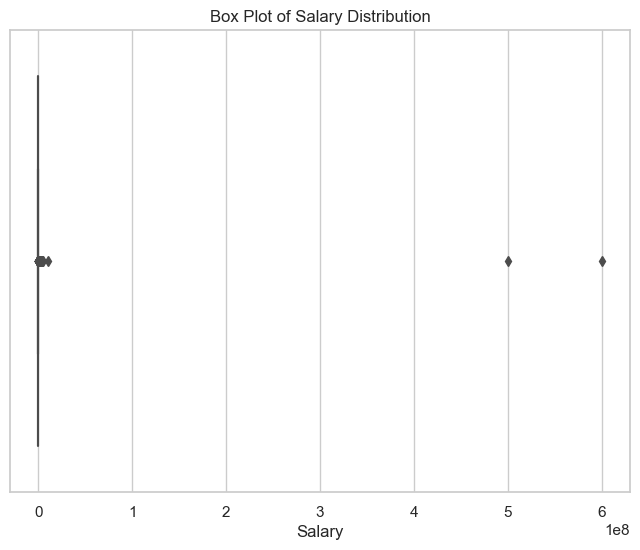

Identified Outliers:
      work_year experience_level employment_type  \
13         2024               SE              FT   
41         2024               SE              FT   
49         2024               MI              FT   
119        2024               SE              FT   
127        2024               EX              FT   
...         ...              ...             ...   
5242       2021               SE              FT   
5245       2021               MI              FT   
5295       2021               SE              FT   
5297       2021               EX              FT   
5324       2020               MI              FT   

                               job_title     salary salary_currency  \
13                     Security Engineer   329500.0             USD   
41                    Security Architect   332300.0             USD   
49                     Security Engineer   700000.0             USD   
119           Security Software Engineer   350000.0             USD   

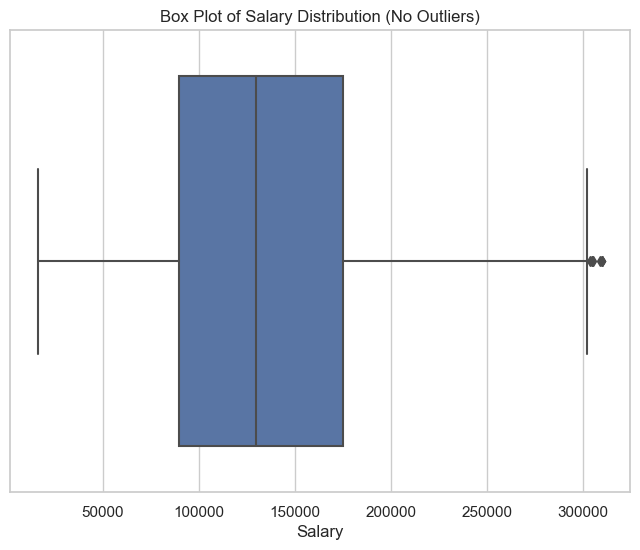

In [33]:
# Set the style of seaborn for better aesthetics
sns.set(style="whitegrid")

# Plotting a box plot to visualize the distribution of salaries
plt.figure(figsize=(8, 6))
sns.boxplot(x='salary', data=df_cleaned)
plt.title('Box Plot of Salary Distribution')
plt.xlabel('Salary')
plt.show()

# Calculate the interquartile range (IQR)
Q1 = df_cleaned['salary'].quantile(0.25)
Q3 = df_cleaned['salary'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df_cleaned[(df_cleaned['salary'] < lower_bound) | (df_cleaned['salary'] > upper_bound)]

# Display the identified outliers
print("Identified Outliers:")
print(outliers)

# Remove outliers from the dataset
df_cleaned_no_outliers = df_cleaned[(df_cleaned['salary'] >= lower_bound) & (df_cleaned['salary'] <= upper_bound)]

# Plotting a box plot after removing outliers to confirm
plt.figure(figsize=(8, 6))
sns.boxplot(x='salary', data=df_cleaned_no_outliers)
plt.title('Box Plot of Salary Distribution (No Outliers)')
plt.xlabel('Salary')
plt.show()

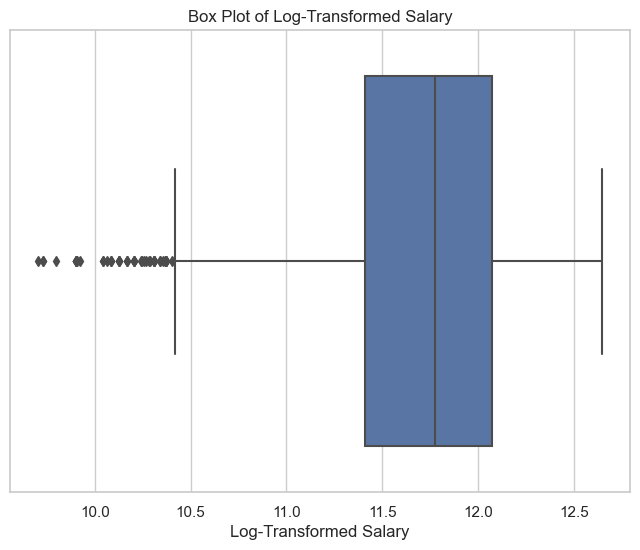

In [38]:
# Log transformation of the 'salary' column
df_cleaned_no_outliers_copy = df_cleaned_no_outliers.copy()
df_cleaned_no_outliers_copy['salary_log'] = np.log1p(df_cleaned_no_outliers_copy['salary'])

# Plotting a box plot of the log-transformed salary
plt.figure(figsize=(8, 6))
sns.boxplot(x='salary_log', data=df_cleaned_no_outliers_copy)
plt.title('Box Plot of Log-Transformed Salary')
plt.xlabel('Log-Transformed Salary')
plt.show()

In [41]:
df_cleaned_no_outliers_copy.shape

(3548, 12)

Identified Outliers in Log-Transformed Salary:
      work_year experience_level employment_type  \
449        2023               EN              FT   
675        2023               MI              FT   
1259       2023               MI              FT   
1287       2023               EN              FT   
2094       2023               EN              FT   
2820       2023               MI              FT   
2917       2023               MI              FT   
3129       2023               MI              FT   
3136       2023               EN              FT   
3301       2023               EN              FT   
3383       2023               EN              FT   
3496       2023               MI              FT   
3497       2023               MI              FT   
3500       2022               MI              FT   
3646       2022               SE              FT   
3669       2022               EN              PT   
3764       2022               MI              FT   
3930       2022  

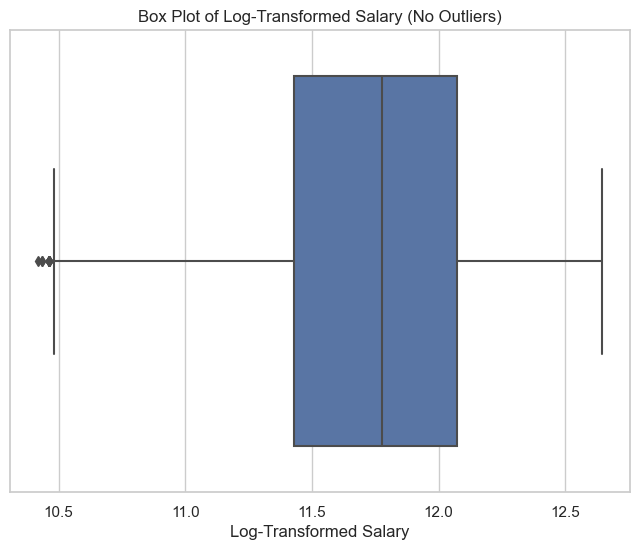

In [39]:
# Calculate the interquartile range (IQR) for log-transformed salary
Q1_log = df_cleaned_no_outliers_copy['salary_log'].quantile(0.25)
Q3_log = df_cleaned_no_outliers_copy['salary_log'].quantile(0.75)
IQR_log = Q3_log - Q1_log

# Define the upper and lower bounds for outliers in log-transformed salary
lower_bound_log = Q1_log - 1.5 * IQR_log
upper_bound_log = Q3_log + 1.5 * IQR_log

# Identify outliers in log-transformed salary
outliers_log = df_cleaned_no_outliers_copy[(df_cleaned_no_outliers_copy['salary_log'] < lower_bound_log) | (df_cleaned_no_outliers_copy['salary_log'] > upper_bound_log)]

# Display the identified outliers
print("Identified Outliers in Log-Transformed Salary:")
print(outliers_log)

# Remove outliers from the dataset
df_no_outliers_log = df_cleaned_no_outliers_copy[(df_cleaned_no_outliers_copy['salary_log'] >= lower_bound_log) & (df_cleaned_no_outliers_copy['salary_log'] <= upper_bound_log)]

# Plotting a box plot after removing outliers to confirm
plt.figure(figsize=(8, 6))
sns.boxplot(x='salary_log', data=df_no_outliers_log)
plt.title('Box Plot of Log-Transformed Salary (No Outliers)')
plt.xlabel('Log-Transformed Salary')
plt.show()

In [43]:
df_no_outliers_log = df_no_outliers_log.drop('salary_log', axis=1)

In [45]:
# Save the cleaned dataset to a new CSV file
df_no_outliers_log.to_csv('Data\cleaned_salaries.csv', index=False)